# <img style="float: left; padding-right: 10px; width: 45px" src="styles/iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2019**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Classroom.
- The deliverables in Classroom are: a) This python notebook with your code and answers, b) a .pdf version of this notebook, c) The BibTex file you created.
d) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## Part A [50 pts]:  Help a professor convert his publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### <p class='q1'> Question 1: Parsing using Regular Expressions 
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. 

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [2]:
# import the regular expressions library
import re

In [3]:
# use this file 
pub_filename = 'data/publist_super_clean.html'

In [4]:
# definition of get_pubs
def get_pubs(filename: str) -> str:
    
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''
    
    f = open(filename, 'r')
    profpubs = f.read()
    return profpubs

In [5]:
# check your code 
# print (prof_pubs)
prof_pubs = get_pubs(pub_filename)
print(prof_pubs)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<TITLE>Kaxiras E journal publications</TITLE>
<HEAD>
<meta http-equiv="Content-Type" content="text/html;charset=UTF-8">
<LINK REL="stylesheet" TYPE="text/css" HREF="../styles/style_pubs.css">
<META NAME="description" CONTENT="">
<META NAME="keywords" CONTENT="Kaxiras E, Multiscale Methods, Computational Materials" >
</HEAD>

<BODY>

<OL START=244>
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAd

You should see an HTML page
```html
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>
</LI>
</OL>
    ```

#### 1.2

In [6]:
# your code here
print(prof_pubs.count('C.M. Friend'))

5


#### 1.3

In [7]:
# your code here
journals = re.findall('<I>(.*)</I>', prof_pubs)
journals = sorted(list(set(journals)))

In [8]:
# check your code: print journals
journals

['2010 ACM/IEEE International Conference for High Performance ',
 'ACSNano. ',
 'Ab initio',
 'Acta Mater. ',
 'Catal. Sci. Technol. ',
 'Chem. Eur. J. ',
 'Comp. Phys. Comm. ',
 'Concurrency Computat.: Pract. Exper. ',
 'Energy & Environmental Sci. ',
 'Int. J. Cardiovasc. Imaging ',
 'J. Chem. Phys. ',
 'J. Chem. Theory Comput. ',
 'J. Phys. Chem. B ',
 'J. Phys. Chem. C ',
 'J. Phys. Chem. Lett. ',
 'J. Stat. Mech: Th. and Exper. ',
 'Langmuir ',
 'Molec. Phys. ',
 'Nano Lett. ',
 'NanoLett. ',
 'New J. Phys. ',
 'New Journal of Physics ',
 'PHYSICAL REVIEW B ',
 'Phil. Trans. R. Soc. A ',
 'Phys. Rev. B ',
 'Phys. Rev. E - Rap. Comm. ',
 'Phys. Rev. Lett. ',
 'Sci. Model. Simul. ',
 'Sol. St. Comm. ',
 'Top. Catal. ']

Your output should look like this (remember, no duplicates):
```
'ACSNano.',
 'Ab initio',
 'Ab-initio',
 'Acta Mater.',
 'Acta Materialia',
 'Appl. Phys. Lett.',
 'Applied Surface Science',
 'Biophysical J.',
 'Biosensing Using Nanomaterials',

 ...

 'Solid State Physics',
 'Superlattices and Microstructures',
 'Surf. Sci.',
 'Surf. Sci. Lett.',
 'Surface  Science',
 'Surface Review and Letters',
 'Surface Sci. Lett.',
 'Surface Science Lett.',
 'Thin Solid Films',
 'Top. Catal.',
 'Z'}
```

#### 1.4

In [9]:
# our code here
pub_authors = re.findall('<BR> ?(.+)', prof_pubs)
pub_authors = sorted(list(set(pub_authors)))

In [10]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)

A. Gali and E. Kaxiras, 
A. Gali, E. Janzen, P. Deak, G. Kresse and E. Kaxiras, 
A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi, 
Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend,
C.E. Lekka, J. Ren, S. Meng and E. Kaxiras,
C.L. Chang, S.K.R.S. Sankaranarayanan, D. Ruzmetov, M.H. Engelhard, E. Kaxiras and S. Ramanathan, 
E. Kaxiras and S. Succi, 
E. Manousakis, J. Ren, S. Meng and E. Kaxiras, 
E.M. Kotsalis, J.H. Walther, E. Kaxiras and P. Koumoutsakos,  
F.J. Rybicki, S. Melchionna, D. Mitsouras, A.U. Coskun, A.G. Whitmore, E. Kaxiras, S. Succi, P.H. Stone and C.L. Feldman,  
H. Chen, W.G. Zhu, E. Kaxiras, and Z.Y. Zhang,
H. Li, J.M. Knaup, E. Kaxiras and J.J. Vlassak,
H.P. Chen, R.K. Kalia, E. Kaxiras, G. Lu, A. Nakano, K. Nomura,
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,
J. Ren, E. Kaxiras and S. Meng, 
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend,
Jan 

Your output should look like this (a line for each paper's author(s) string, with or without the comma)<BR><br>
S. Meng and E. Kaxiras,<br>
G. Lu and E. Kaxiras,<br>
E. Kaxiras and S. Yip,<br>
...<BR>
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,<BR>
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,<BR>
E Kaxiras, and M D Lukin,<BR>

<hr style="height:1px">

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article { _number_
     author = John Doyle
     title = Interaction between atoms
     URL = Papers/PhysRevB_81_085406_2010.pdf
     journal = Phys. Rev. B
     volume = 81
}
```

```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup]  (http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder.  

    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [11]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [12]:
# your code here

# definition of make_soup
def make_soup(filename: str) -> BeautifulSoup:      
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page.
    '''
    return BeautifulSoup(get_pubs(filename))

soup = make_soup(pub_filename)

In [13]:
# check your code: print the Beautiful Soup object, you should see an HTML page
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><title>Kaxiras E journal publications</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head><body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look like this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

#### 2.2

In [14]:
# your code here
papers = soup.find_all('li')
bibtex = ''
for paper in papers:
    bibtex += '@article\n'
    bibtex += '{    '
    bibtex += 'author = '
    bibtex += re.findall('<br/>(.+)',str(paper))[0].strip(' ').strip(',').strip(' ')
    bibtex += '\n     title = '
    #print(paper)
    bibtex += paper.find('a').getText().strip('\n').strip(' ')
    bibtex += '\n     URL = '
    bibtex += paper.find('a')['href'].strip(' ')
    bibtex += '\n     journal = '
    bibtex += paper.find('i').getText().strip(' ')
    if paper.find('b') is not None:
        bibtex += '\n     volume = '
        bibtex += paper.find('b').getText().strip(' ')
    bibtex += '\n}\n\n'

with open('publist.bib', 'w') as f:
    f.write(bibtex)

In [15]:
# check your code: print the BibTex file
f = open('publist.bib','r')
print (f.read())

@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

@article
{    author = JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
     title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"
     URL = Papers/2011/PhysRevB_84_035325_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

@article
{    author = Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
     title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"
     URL = Papers/2011/PhysRevB_83_054204_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 83
}

@article
{    author = Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam 

Your output should look like this
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

...

@article
{    author = E. Kaxiras and S. Succi
     title = "Multiscale simulations of complex systems: computation meets reality"
     URL = Papers/SciModSim_15_59_2008.pdf
     journal = Sci. Model. Simul.
     volume = 15
}
@article
{    author = E. Manousakis, J. Ren, S. Meng and E. Kaxiras
     title = "Effective Hamiltonian for FeAs-based superconductors"
     URL = Papers/PhysRevB_78_205112_2008.pdf
     journal = Phys. Rev. B
     volume = 78
}
```

---

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is **not** given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and **submit** this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).

**1.7** You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?
- How many performers started as child actors? Define child actor as a person less than 12 years old. 
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

**1.8** Make a plot of the number of credits versus the name of actor/actress. 
 


### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [16]:
import requests

#### 1.1

In [17]:
# your code here
my_page = requests.get('https://www.imdb.com/list/ls025814950/')

In [18]:
print(my_page.text)





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 100 Stars of 2017 - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld

In [30]:
print(my_page.status_code)

200


In [31]:
print(my_page.content)

b'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2017 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (

<HR>
    
Your anwers here:
- `my_page.content`: byte string of the HTML of the page;
- `my_page.text`: string of the HTML of the page;
- `my_page.status_code`: '200' means it was a successful request.
    
<HR>

#### 1.2

In [32]:
# your code here
star_soup = BeautifulSoup(my_page.content)

In [33]:
# check your code - you should see an HTML page
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [176]:
# your code here
import time
from tqdm import tqdm

def parse_stars(star_soup):
    actors = star_soup.find_all('div', {'class': 'lister-item mode-detail'})
    starlist = []
    for actor in tqdm(actors):
        star = {}
        name = re.findall('<a href="/name/.+">(.[\w].*)',str(actor))[0].strip()
        star.update({'name': name})
        gender = 1
        if 'Actor' in str(actor.find_all('p')[0]):
            gender = 0
        star.update({'gender': gender})
        url = 'https://www.imdb.com'
        url += re.findall('<a href="(/name/.+)">.[\w].*',str(actor))[0]
        star.update({'url': url})
        page = requests.get(url)
        time.sleep(np.random.randint(8, 12))
        page = BeautifulSoup(page.content)
        star.update({'page': page})
        starlist.append(star)
    return starlist

starlist = parse_stars(star_soup)

100%|██████████| 100/100 [19:38<00:00, 11.79s/it]


In [185]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757',
 'page': <!DOCTYPE html>
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (typeof uex

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [217]:
# your code here

def create_star_table(starlist: list) -> list:
    star_table = []
    for actor in tqdm(starlist):
        star = {}
        star.update({'star_name': actor['name']})
        star.update({'gender': actor['gender']})
        search = re.findall('birth_year=(\d{4})', str(actor['page']))
        if len(search) >= 1:
            year_born = search[0]
        else:
            year_born = None
        star.update({'year_born': year_born})
        first_job = actor['page'].find(
            'div',
            {'class':'filmo-category-section'}
        ).find_all(
            'div',
            {'class':['filmo-row even', 'filmo-row odd']}
        )[-1]
        first_movie = re.findall('<a href="/title/.+">(.+)</a>', str(first_job))[0]
        star.update({'first_movie': first_movie})
        first_movie_year = re.findall(
            '.*(\d{4}).*',
            first_job.find_all('span', {'class': 'year_column'})[0].getText()
        )[0]
        star.update({'year_first_movie': first_movie_year})
        credits = re.findall('(\d+)\scredits?', str(actor['page']))[0]
        star.update({'credits': credits})
        star_table.append(star)
    return star_table

In [218]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table = create_star_table(starlist)

100%|██████████| 100/100 [00:16<00:00,  6.10it/s]


In [219]:
# check your code
star_table

[{'star_name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Shemesh',
  'year_first_movie': '1999',
  'credits': '32'},
 {'star_name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '56'},
 {'star_name': 'Emilia Clarke',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '20'},
 {'star_name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2003',
  'credits': '59'},
 {'star_name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '36'},
 {'star_name': 'Pom Klementieff',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Perigosa Obsessão',
  'year_first_movie': '2007',
  'credits': '37'},
 {'star_name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_movie': 'Una 

Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [220]:
# your code here

import json

with open('star_table.json', 'w') as f:
    json.dump(star_table, f)

#### 1.6

In [243]:
# your code here
df = pd.read_json('data/staff_starinfo.json')
df.sample(10)

,name,gender,year_born,first_movie,year_first_movie,credits
79,Joan Crawford,1,1906,Lady of the Night,1925,105
63,Daisy Ridley,1,1992,Only Yesterday,1991,32
72,Finn Jones,0,1988,Hollyoaks Later,2009,14
15,Jennifer Lawrence,1,1990,Monk,2006,30
35,Eiza González,1,1990,Lola: Érase una vez,2007,19
33,Dafne Keen,1,1966,The Refugees,2014-2015,4
43,Bill Paxton,0,1955,Crazy Mama,1975,94
61,Kaya Scodelario,1,1992,Moon,2009,23
12,Felicity Jones,1,1983,The Treasure Seekers,1998,42
58,Travis Fimmel,0,1979,I Used the Staff Solution,2001,26


In [244]:
# Check the values
df.describe()

,gender,year_born,credits
count,100.000000,100.000000,100.000000
mean,0.730000,1983.080000,38.470000
std,0.446196,12.664816,22.416379
min,0.000000,1906.000000,4.000000
25%,0.000000,1979.000000,22.000000
50%,1.000000,1985.500000,34.500000
75%,1.000000,1990.000000,51.000000
max,1.000000,2004.000000,122.000000


In [245]:
# Check possible outlier
df[df.year_born == 1906]

,name,gender,year_born,first_movie,year_first_movie,credits
79,Joan Crawford,1,1906,Lady of the Night,1925,105


In [246]:
# Check variables types
df.dtypes

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie    object
credits              int64
dtype: object

In [247]:
# Check the movies with 'year_first_movie' duplicated
df[df.year_first_movie.str.len() > 4]

,name,gender,year_born,first_movie,year_first_movie,credits
3,Alexandra Daddario,1,1986,All My Children,2002-2003,51
23,Cara Delevingne,1,1992,Anna Karenina,2012/I,20
29,Robin Wright,1,1966,The Yellow Rose,1983-1984,54
33,Dafne Keen,1,1966,The Refugees,2014-2015,4
46,Jason Momoa,0,1979,Baywatch,1999-2001,27
60,Cole Sprouse,0,1992,Grace Under Fire,1993-1998,35
77,Rebecca Ferguson,1,1983,Nya tider,1999-2000,25
78,Julia Garner,1,1994,The Dreamer,2010/II,27
86,Auli'i Cravalho,1,2000,Moana,2016/I,4
96,Elodie Yung,1,1981,La vie devant nous,2002-2003,22


In [248]:
# Deal with these years
df.year_first_movie = pd.to_numeric(df.year_first_movie.str[:4])
df.sample(10)

,name,gender,year_born,first_movie,year_first_movie,credits
93,Sophie Turner,1,1996,Another Me,2013,13
7,Dan Stevens,0,1982,Frankenstein,2004,37
59,Charlize Theron,1,1975,Children of the Corn III: Urban Harvest,1995,58
54,Katherine Waterston,1,1980,Americana,2004,43
21,Sophia Lillis,1,2002,The Lipstick Stain,2014,13
58,Travis Fimmel,0,1979,I Used the Staff Solution,2001,26
43,Bill Paxton,0,1955,Crazy Mama,1975,94
64,Emily Browning,1,1988,The Echo of Thunder,1998,30
22,Jessica Henwick,1,1992,St Trinian's 2: The Legend of Fritton's Gold,2009,25
82,Bryce Dallas Howard,1,1981,Parenthood,1989,33


In [249]:
# Check types again
df.dtypes

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie     int64
credits              int64
dtype: object

In [250]:
# Create new variable
df['age_at_first_movie'] = df.year_first_movie - df.year_born
df.sample(10)

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
36,Laura Haddock,1,1985,My Family,2007,35,22
85,Connie Nielsen,1,1965,How Did You Get In? We Didn't See You Leave,1984,51,19
59,Charlize Theron,1,1975,Children of the Corn III: Urban Harvest,1995,58,20
13,Emma Stone,1,1988,The New Partridge Family,2005,42,17
41,Katheryn Winnick,1,1977,PSI Factor: Chronicles of the Paranormal,1999,61,22
99,Christian Navarro,0,1966,Day of the Dead 2: Contagium,2005,13,39
4,Bill Skarsgård,0,1990,Järngänget,2000,30,10
98,Nina Dobrev,1,1989,Playing House,2006,41,17
28,Alison Brie,1,1982,Stolen Poem,2004,61,22
68,Hugh Jackman,0,1968,Law of the Land,1994,57,26


#### 1.7.1

In [259]:
# your code here
print(str(len(df[df.age_at_first_movie == 17].index)) + ' performers made their first movie at 17')

8 performers made their first movie at 17


Your output should look like this:<BR>
8 performers made their first movie at 17

#### 1.7.2

In [263]:
# your code here

print(str(len(df[df.age_at_first_movie < 12].index)) + ' performers started as child actors')

20 performers started as child actors


#### 1.8

In [275]:
# your code here
df[df.credits == df.credits.max()]

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
42,Sean Young,1,1959,Jane Austen in Manhattan,1980,122,21


<HR>

The most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017 is Sean Young.
    
<HR>

In [276]:
from IPython.core.display import HTML
def css_styling(): styles = open("styles/cs109.css", "r").read(); return HTML(styles)
css_styling()

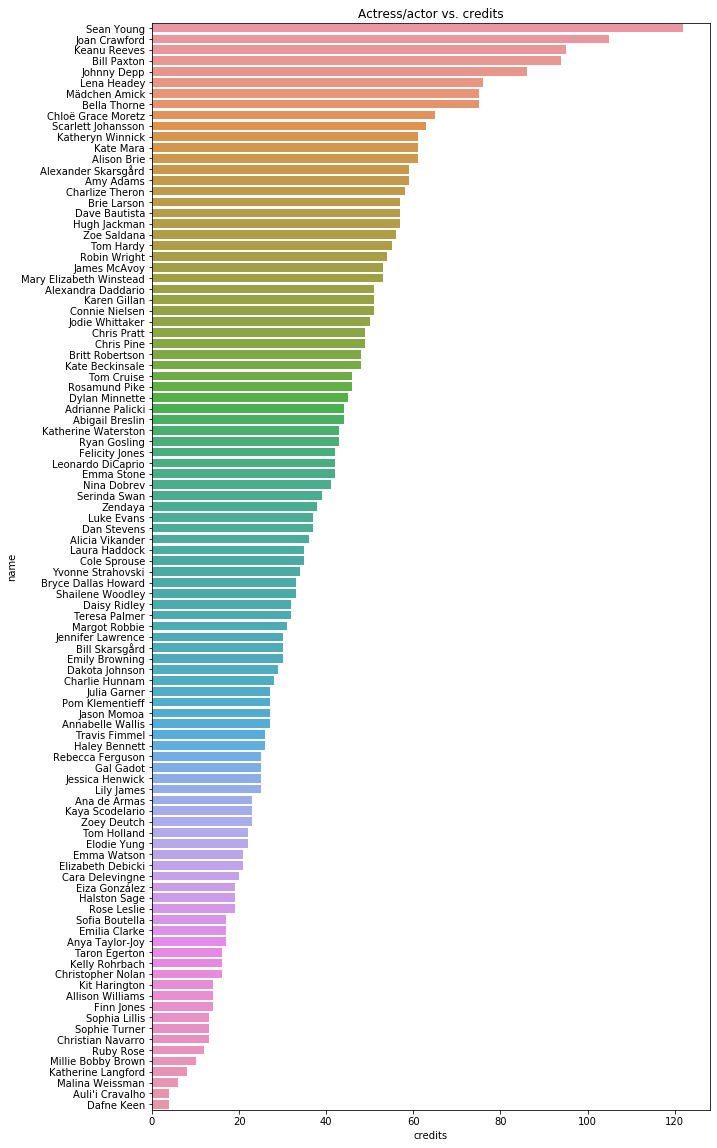

In [301]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot('credits', 'name', data=df.sort_values('credits', ascending=False), ax=ax)
ax.set_title('Actress/actor vs. credits')
plt.show()